In [1]:
# Esercizio sulla regressione lineare semplice
# Dato il file DATA_reg_lin 
# Il peso corporeo e la pressione sistolica del sangue di 26 individui maschi selezionati in modo cassuale 
# nella fascia d'età che va da 25 a 30 anni sono mostrati in tabella
# Assumiamo che il peso e la pressione sanguigna siano normalmente distribuiti

# - Si determini la retta di regrezione
# - Si calcolino gli intervalli di confidenza per i coefficenti di regressione 
# - Si testi la significatività della regressione usando alpha = 0.05
# - Si calcoli il coefficiente di determinazione

In [2]:
import numpy as np

In [3]:
DATA = np.loadtxt("DATA_reg_lin.dat") #carica i dati 
x = DATA[:,1]    # Peso corporeo estrae la seconda colonna indice 1 dei dati caricati e la ssegna alla variabile x
y = DATA[:,2]    # Pressione sistolica
display(x,y)

array([165., 167., 180., 155., 212., 175., 190., 210., 200., 149., 158.,
       169., 170., 172., 159., 168., 174., 183., 215., 195., 180., 143.,
       240., 235., 192., 187.])

array([130., 133., 150., 128., 151., 146., 150., 140., 148., 125., 133.,
       135., 150., 153., 128., 132., 149., 158., 150., 163., 156., 124.,
       170., 165., 160., 159.])

In [7]:
# Calcolo dei coefficienti di regressione y = b_0 + b_1 x

In [4]:
x_bar = np.mean(x) #media del peso corporeo
y_bar = np.mean(y) #media della pressione sistolica
n = x.size

In [5]:
sig_xy = np.sum((x-x_bar)*(y-y_bar))/n # covarianza campionaria
display(sig_xy)

247.00887573964494

In [6]:
sig_x_2 = np.sum((x-x_bar)**2.)/n #varianza campionaria
display(sig_x_2)

588.9363905325444

In [10]:
#slide 12 della regressione lineare
b_0 = y_bar - sig_xy/sig_x_2*x_bar
b_1 = sig_xy/sig_x_2
print("B_0 = ", b_0, 'B_1 = ', b_1)

B_0 =  69.10437279118659 B_1 =  0.41941520291569645


In [12]:
xx = np.linspace(140.,240.,1000) # vettore di 1000 varibili compresi tra 140 e 240 
display(xx)
yy = b_0 + b_1*xx
display(yy)

array([140.        , 140.1001001 , 140.2002002 , 140.3003003 ,
       140.4004004 , 140.5005005 , 140.6006006 , 140.7007007 ,
       140.8008008 , 140.9009009 , 141.001001  , 141.1011011 ,
       141.2012012 , 141.3013013 , 141.4014014 , 141.5015015 ,
       141.6016016 , 141.7017017 , 141.8018018 , 141.9019019 ,
       142.002002  , 142.1021021 , 142.2022022 , 142.3023023 ,
       142.4024024 , 142.5025025 , 142.6026026 , 142.7027027 ,
       142.8028028 , 142.9029029 , 143.003003  , 143.1031031 ,
       143.2032032 , 143.3033033 , 143.4034034 , 143.5035035 ,
       143.6036036 , 143.7037037 , 143.8038038 , 143.9039039 ,
       144.004004  , 144.1041041 , 144.2042042 , 144.3043043 ,
       144.4044044 , 144.5045045 , 144.6046046 , 144.7047047 ,
       144.8048048 , 144.9049049 , 145.00500501, 145.10510511,
       145.20520521, 145.30530531, 145.40540541, 145.50550551,
       145.60560561, 145.70570571, 145.80580581, 145.90590591,
       146.00600601, 146.10610611, 146.20620621, 146.30

array([127.8225012 , 127.8644847 , 127.90646821, 127.94845171,
       127.99043521, 128.03241872, 128.07440222, 128.11638573,
       128.15836923, 128.20035273, 128.24233624, 128.28431974,
       128.32630324, 128.36828675, 128.41027025, 128.45225376,
       128.49423726, 128.53622076, 128.57820427, 128.62018777,
       128.66217128, 128.70415478, 128.74613828, 128.78812179,
       128.83010529, 128.87208879, 128.9140723 , 128.9560558 ,
       128.99803931, 129.04002281, 129.08200631, 129.12398982,
       129.16597332, 129.20795682, 129.24994033, 129.29192383,
       129.33390734, 129.37589084, 129.41787434, 129.45985785,
       129.50184135, 129.54382485, 129.58580836, 129.62779186,
       129.66977537, 129.71175887, 129.75374237, 129.79572588,
       129.83770938, 129.87969289, 129.92167639, 129.96365989,
       130.0056434 , 130.0476269 , 130.0896104 , 130.13159391,
       130.17357741, 130.21556092, 130.25754442, 130.29952792,
       130.34151143, 130.38349493, 130.42547843, 130.46

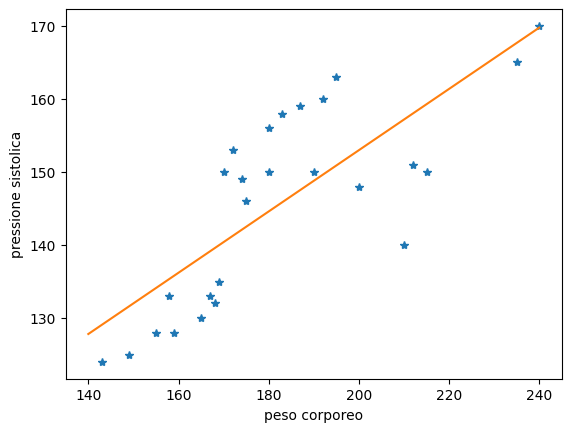

In [15]:
import matplotlib.pyplot as plt
plt.plot(x, y, '*')
plt.plot(xx, yy)
plt.xlabel('peso corporeo')
plt.ylabel('pressione sistolica')
plt.show()

In [19]:
# Calcolo dei residui le differenze tra i valori osservati e quelli previsti 
y_hat = b_0 + b_1*x
r = y - y_hat

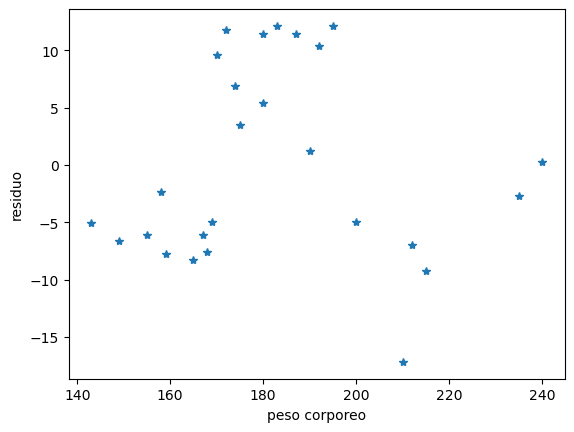

In [21]:
plt.plot(x, r, '*')
plt.xlabel('peso corporeo')
plt.ylabel('residuo')
plt.show()

In [24]:
# Varianza campionaria residua
s2 = np.sum(r**2.)/(n-2)
display(s2)

75.35719270439562

In [25]:
from scipy.stats import t
alpha = 0.05
T = t.ppf(1.-alpha/2.,n-2)
b_0_l = b_0 - np.sqrt(s2)*np.sqrt(1./n + x_bar**2./(n*sig_x_2))*T
b_0_r = b_0 + np.sqrt(s2)*np.sqrt(1./n + x_bar**2./(n*sig_x_2))*T

b_1_l = b_1 - np.sqrt(s2)/np.sqrt(n*sig_x_2)*T
b_1_r = b_1 + np.sqrt(s2)/np.sqrt(n*sig_x_2)*T

display(b_0)
display(b_0_l,b_0_r)

display(b_1)
display(b_1_l,b_1_r)

69.10437279118659

42.45917560573429

95.7495699766389

0.41941520291569645

0.2746281144802124

0.5642022913511805

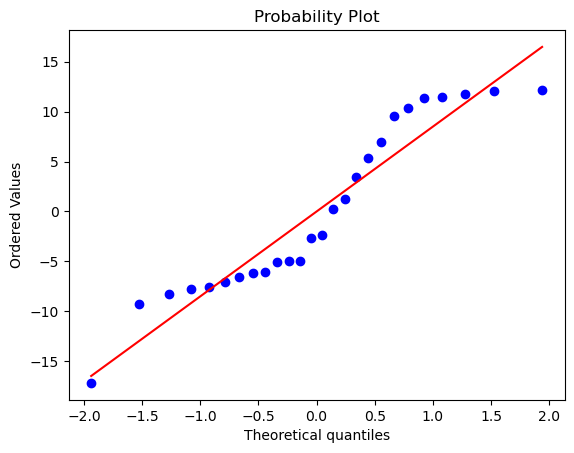

In [23]:
from scipy.stats import probplot
from scipy.stats import norm
fig, ax = plt.subplots(1, 1)
probplot(r, dist=norm, plot=ax)
plt.show()

In [26]:
# Test di significatività
# H0 : beta_1 = 0
# H1 : beta_1 <> 0

alpha = 0.05
T1 = np.sqrt(n)*b_1*np.sqrt(sig_x_2)/np.sqrt(s2)
display(T1)
T = t.ppf(1.-alpha/2.,n-2)
display(T)

5.9786438374879545

2.0638985616280205

In [27]:
# Si rigetta l'ipotesi nulla in favore di quella alternativa

In [29]:
# Calcolo del coefficiente di determinazione
sig_y_2 = np.sum((y-y_bar)**2.)/n
R2 = sig_xy**2./(sig_x_2*sig_y_2)
display(R2)

0.5982872450148403

In [ ]:
# Il modello di regressione non sembra essere adeguato